In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
df = pd.read_excel('../data/economic_burden/Ministry of Health Budget 2007 To 2023.xlsx')
df.head(5)

,Hijri_year,Gregorian_year,Total_state_budget,Total_budget,Percentage,Workers_Compensation,Goods_and_Services,Expenditures_on_programs,Expenditures_on_projects,Unnamed: 9,Unnamed: 10
0,1427/1428,2007.0,38000000.0,22808200.0,0.060,11527200.0,3781000.0,5200000.0,2300000.0,NaN,NaN
1,1428/1429,2008.0,45000000.0,25220000.0,0.056,12392000.0,4228000.0,6000000.0,2600000.0,NaN,NaN
2,1430/1431,2009.0,47500000.0,29518700.0,0.062,14391400.0,4527300.0,7760000.0,2840000.0,NaN,NaN
3,1431/1432,2010.0,54000000.0,35063200.0,0.065,17150000.0,5213200.0,9560000.0,3140000.0,NaN,NaN
4,1432/1433,2011.0,58000000.0,39860200.0,0.069,19207000.0,5903200.0,11210000.0,3540000.0,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hijri_year                17 non-null     object 
 1   Gregorian_year            17 non-null     float64
 2   Total_state_budget        17 non-null     float64
 3   Total_budget              17 non-null     float64
 4   Percentage                17 non-null     float64
 5   Workers_Compensation      17 non-null     float64
 6   Goods_and_Services        17 non-null     float64
 7   Expenditures_on_programs  17 non-null     float64
 8   Expenditures_on_projects  17 non-null     float64
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               1 non-null      float64
dtypes: float64(10), object(1)
memory usage: 2.0+ KB


In [35]:
expenditure_cols = [
    'Workers_Compensation', 
    'Goods_and_Services', 
    'Expenditures_on_programs', 
    'Expenditures_on_projects'
]

df['Calculated_Expenditures'] = df[expenditure_cols].sum(axis=1)

print("أول 5 صفوف مع إجمالي النفقات المحسوب:")
print(df[['Gregorian_year','Total_budget', 'Calculated_Expenditures']].head())

أول 5 صفوف مع إجمالي النفقات المحسوب:
   Gregorian_year  Total_budget  Calculated_Expenditures
0          2007.0    22808200.0               22808200.0
1          2008.0    25220000.0               25220000.0
2          2009.0    29518700.0               29518700.0
3          2010.0    35063200.0               35063200.0
4          2011.0    39860200.0               39860200.0


In [ ]:
df['Variance'] = df['Total_budget'] - df['Calculated_Expenditures']

inconsistent_years = df[df['Variance'] != 0]

if inconsistent_years.empty:
    print("\n✅ البيانات متسقة تماماً. إجمالي النفقات يساوي إجمالي الميزانية لكل السنوات.")
else:
    print("\n⚠️ تنبيه: تم العثور على اختلاف (Variance) في السنوات التالية:")
    print(inconsistent_years[['Gregorian_year', 'Total_budget', 'Calculated_Expenditures', 'Variance']])


⚠️ تنبيه: تم العثور على اختلاف (Variance) في السنوات التالية:
    Gregorian_year  Total_budget  Calculated_Expenditures   Variance
10          2017.0    67757893.0               67758793.0     -900.0
12          2019.0    75403859.0               68227572.0  7176287.0
15          2022.0    77696297.0               77696294.0        3.0
16          2023.0    80751614.0               80751610.0        4.0
17             NaN           NaN                      0.0        NaN
18             NaN           NaN                      0.0        NaN
19             NaN           NaN                      0.0        NaN
20             NaN           NaN                      0.0        NaN
21             NaN           NaN                      0.0        NaN


In [38]:
print("\n--- الإحصائيات الوصفية للميزانية والنفقات ---")
print(df[['Total_state_budget', 'Total_budget', 'Calculated_Expenditures']].describe())


--- الإحصائيات الوصفية للميزانية والنفقات ---
       Total_state_budget  Total_budget  Calculated_Expenditures
count        1.700000e+01  1.700000e+01             2.200000e+01
mean         7.966471e+07  5.625239e+07             4.314160e+07
std          2.347339e+07  1.969690e+07             2.929663e+07
min          3.800000e+07  2.280820e+07             0.000000e+00
25%          5.800000e+07  3.986020e+07             2.341115e+07
50%          8.550000e+07  5.998536e+07             5.071340e+07
75%          9.780000e+07  7.540386e+07             6.689341e+07
max          1.114000e+08  8.075161e+07             8.075161e+07


In [ ]:
df['YoY_Change_Budget'] = df['Total_budget'].pct_change() * 100

print("\n--- التغير السنوي في الميزانية (%) ---")
print(df[['Gregorian_year', 'Total_budget', 'YoY_Change_Budget']])


--- التغير السنوي في الميزانية (%) ---
    Gregorian_year  Total_budget  YoY_Change_Budget
0           2007.0    22808200.0                NaN
1           2008.0    25220000.0          10.574267
2           2009.0    29518700.0          17.044806
3           2010.0    35063200.0          18.783009
4           2011.0    39860200.0          13.681010
5           2012.0    47076447.0          18.103891
6           2013.0    54350355.0          15.451268
7           2014.0    59985360.0          10.367927
8           2015.0    62342539.0           3.929590
9           2016.0    58899190.0          -5.523274
10          2017.0    67757893.0          15.040450
11          2018.0    64297264.0          -5.107344
12          2019.0    75403859.0          17.273822
13          2020.0    75413147.0           0.012318
14          2021.0    79846364.0           5.878573
15          2022.0    77696297.0          -2.692755
16          2023.0    80751614.0           3.932384
17             NaN      

C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_24052\3523674757.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['YoY_Change_Budget'] = df['Total_budget'].pct_change() * 100


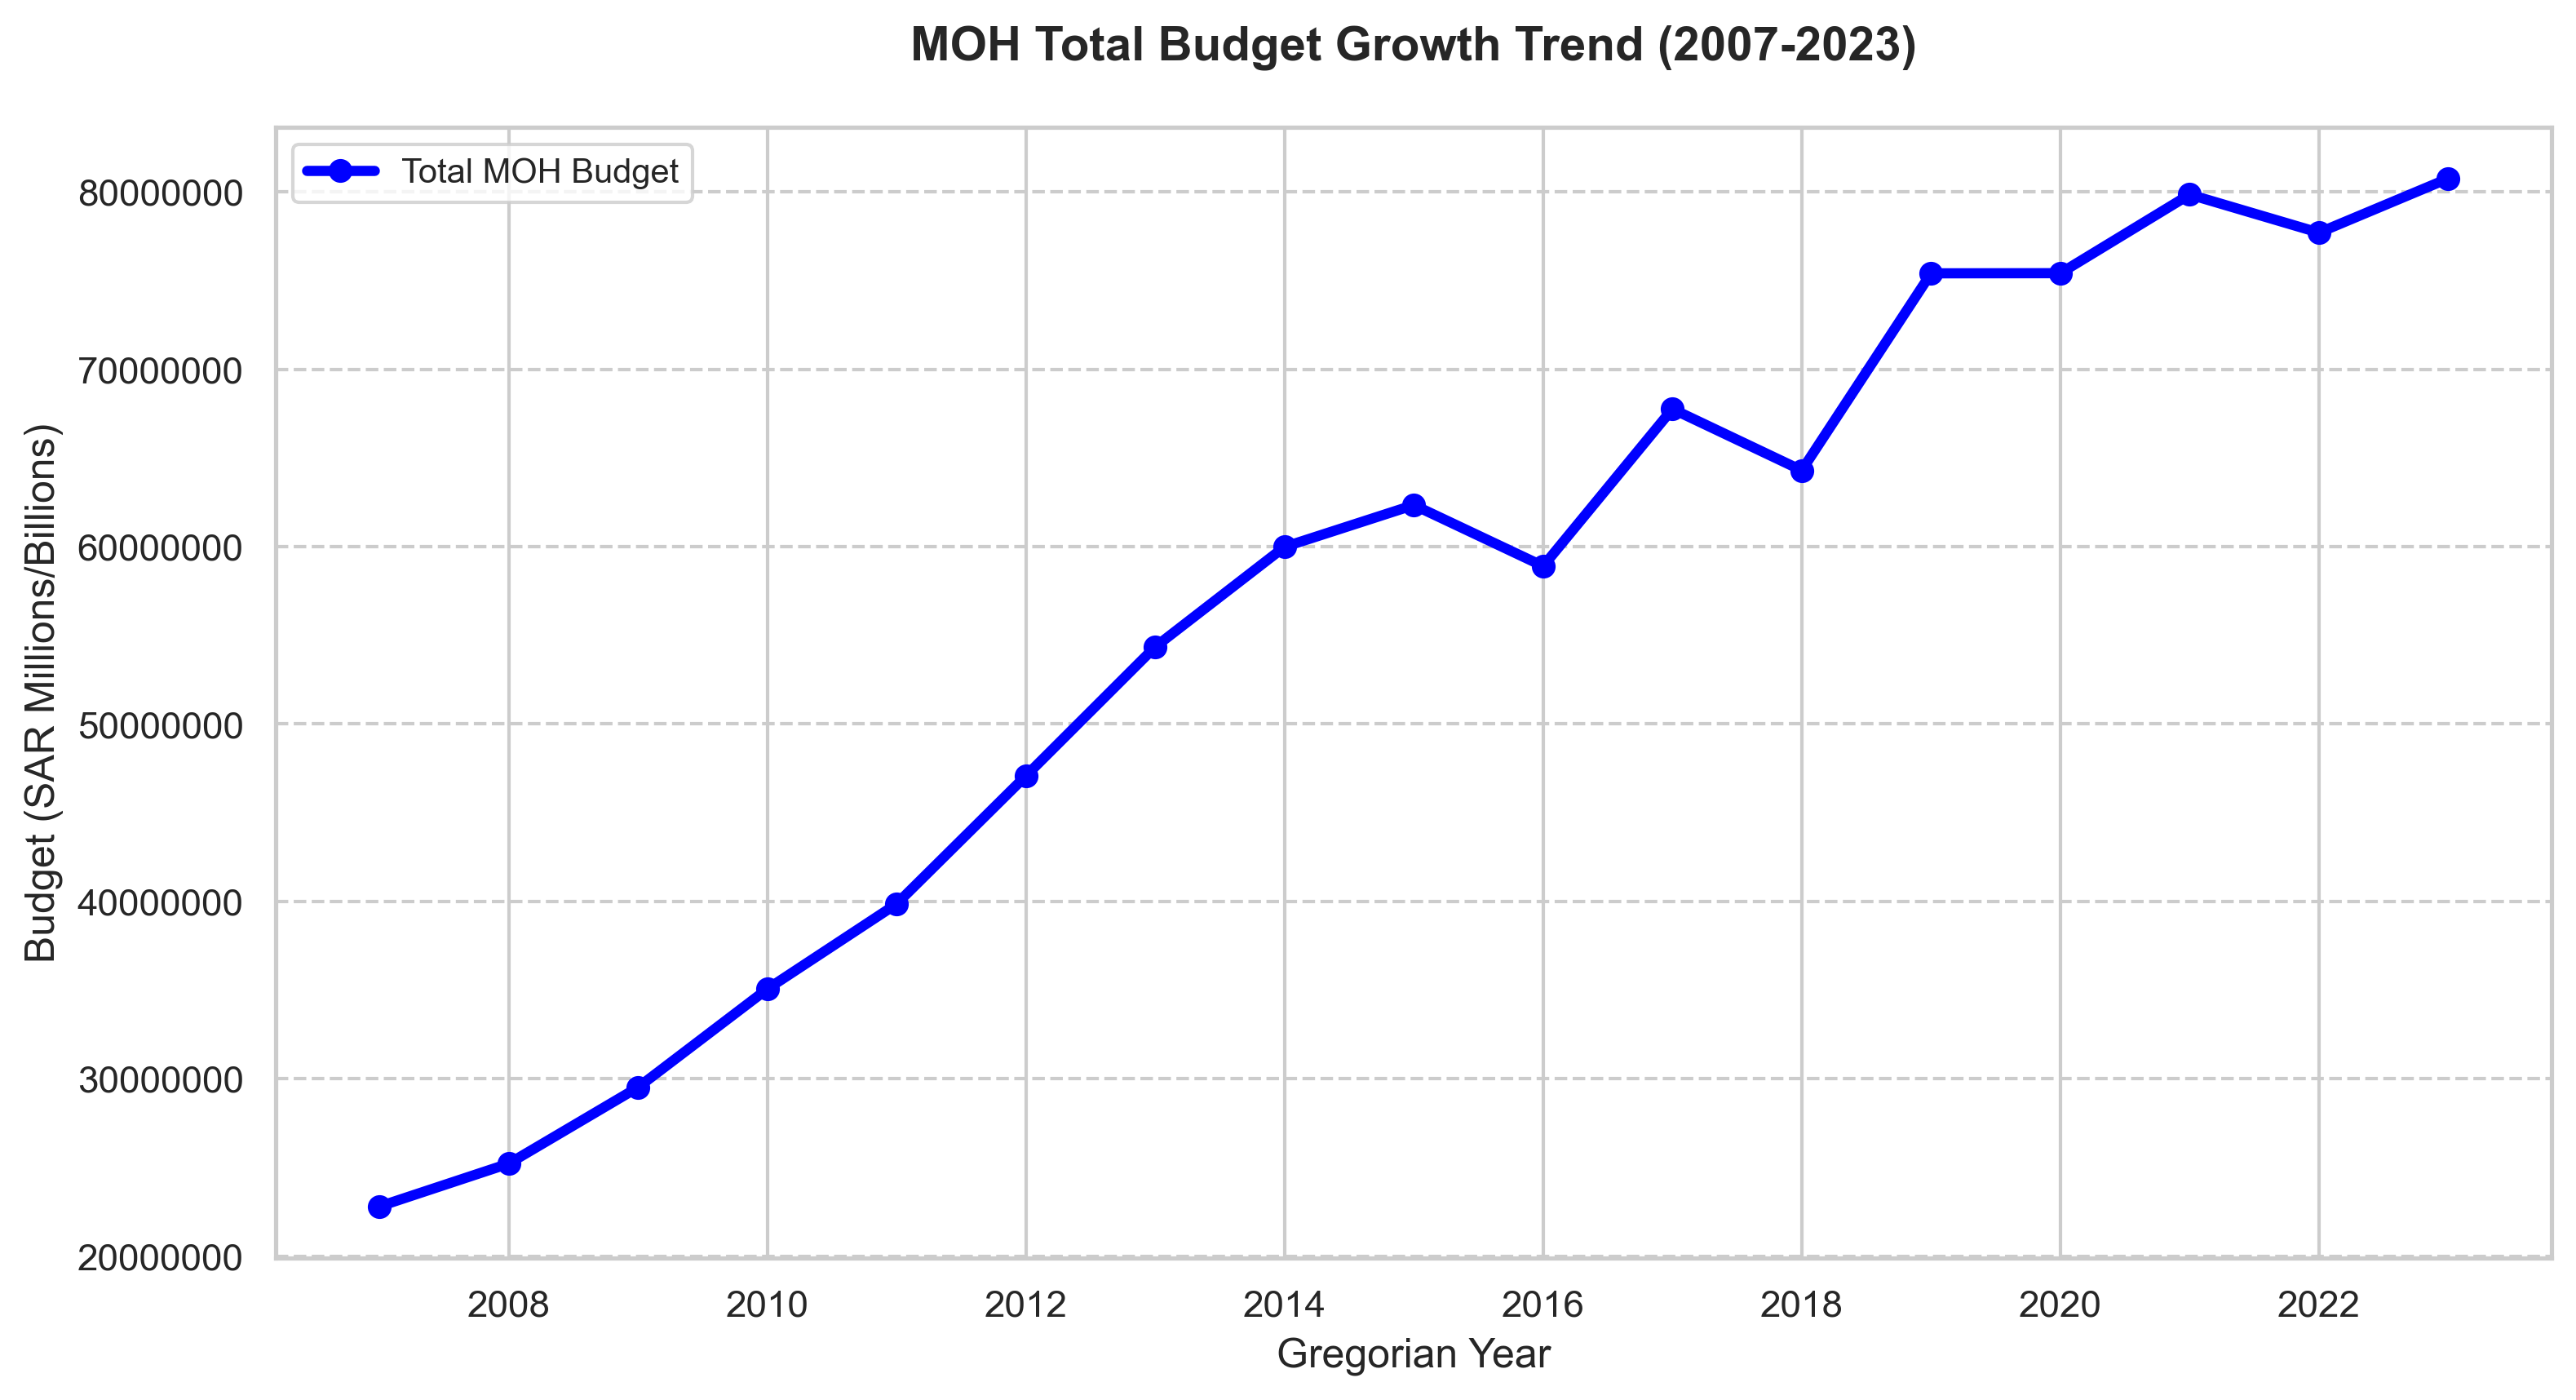

Time Series Line Chart successfully generated. This chart shows the overall budget growth.


In [ ]:

YEAR_COL = 'Gregorian_year' 
COMP_COL = "Workers_Compensation"
GOODS_COL = 'Goods_and_Services' 
PROG_COL = 'Expenditures_on_programs'

BUDGET_COL_CLEAN = "Total_budget"







df = df.set_index(YEAR_COL)

plt.figure(figsize=(12, 6))

plt.plot(df.index, df[BUDGET_COL_CLEAN], label='Total MOH Budget', marker='o', color='blue', linewidth=3)


plt.title('MOH Total Budget Growth Trend (2007-2023)', fontsize=14, pad=20)
plt.xlabel('Gregorian Year', fontsize=12)
plt.ylabel('Budget (SAR Millions/Billions)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

print("Time Series Line Chart successfully generated. This chart shows the overall budget growth.")

>>> STEP 4: ANALYZING MOH BUDGET HISTORY...
   [Success] Loaded 17 years of budget data.
   Last recorded budget (2023): 80.75 Billion SAR
   -> Historical Budget Growth (CAGR): 8.22%
   -> Projected 2030 Budget: 140.40 Billion SAR
   -> NCD Burden 2030: 121.50 Billion SAR
   -> Warning: NCDs could consume 86.5% of the Ministry's budget.


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_24052\1297003856.py:128: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig4.show()


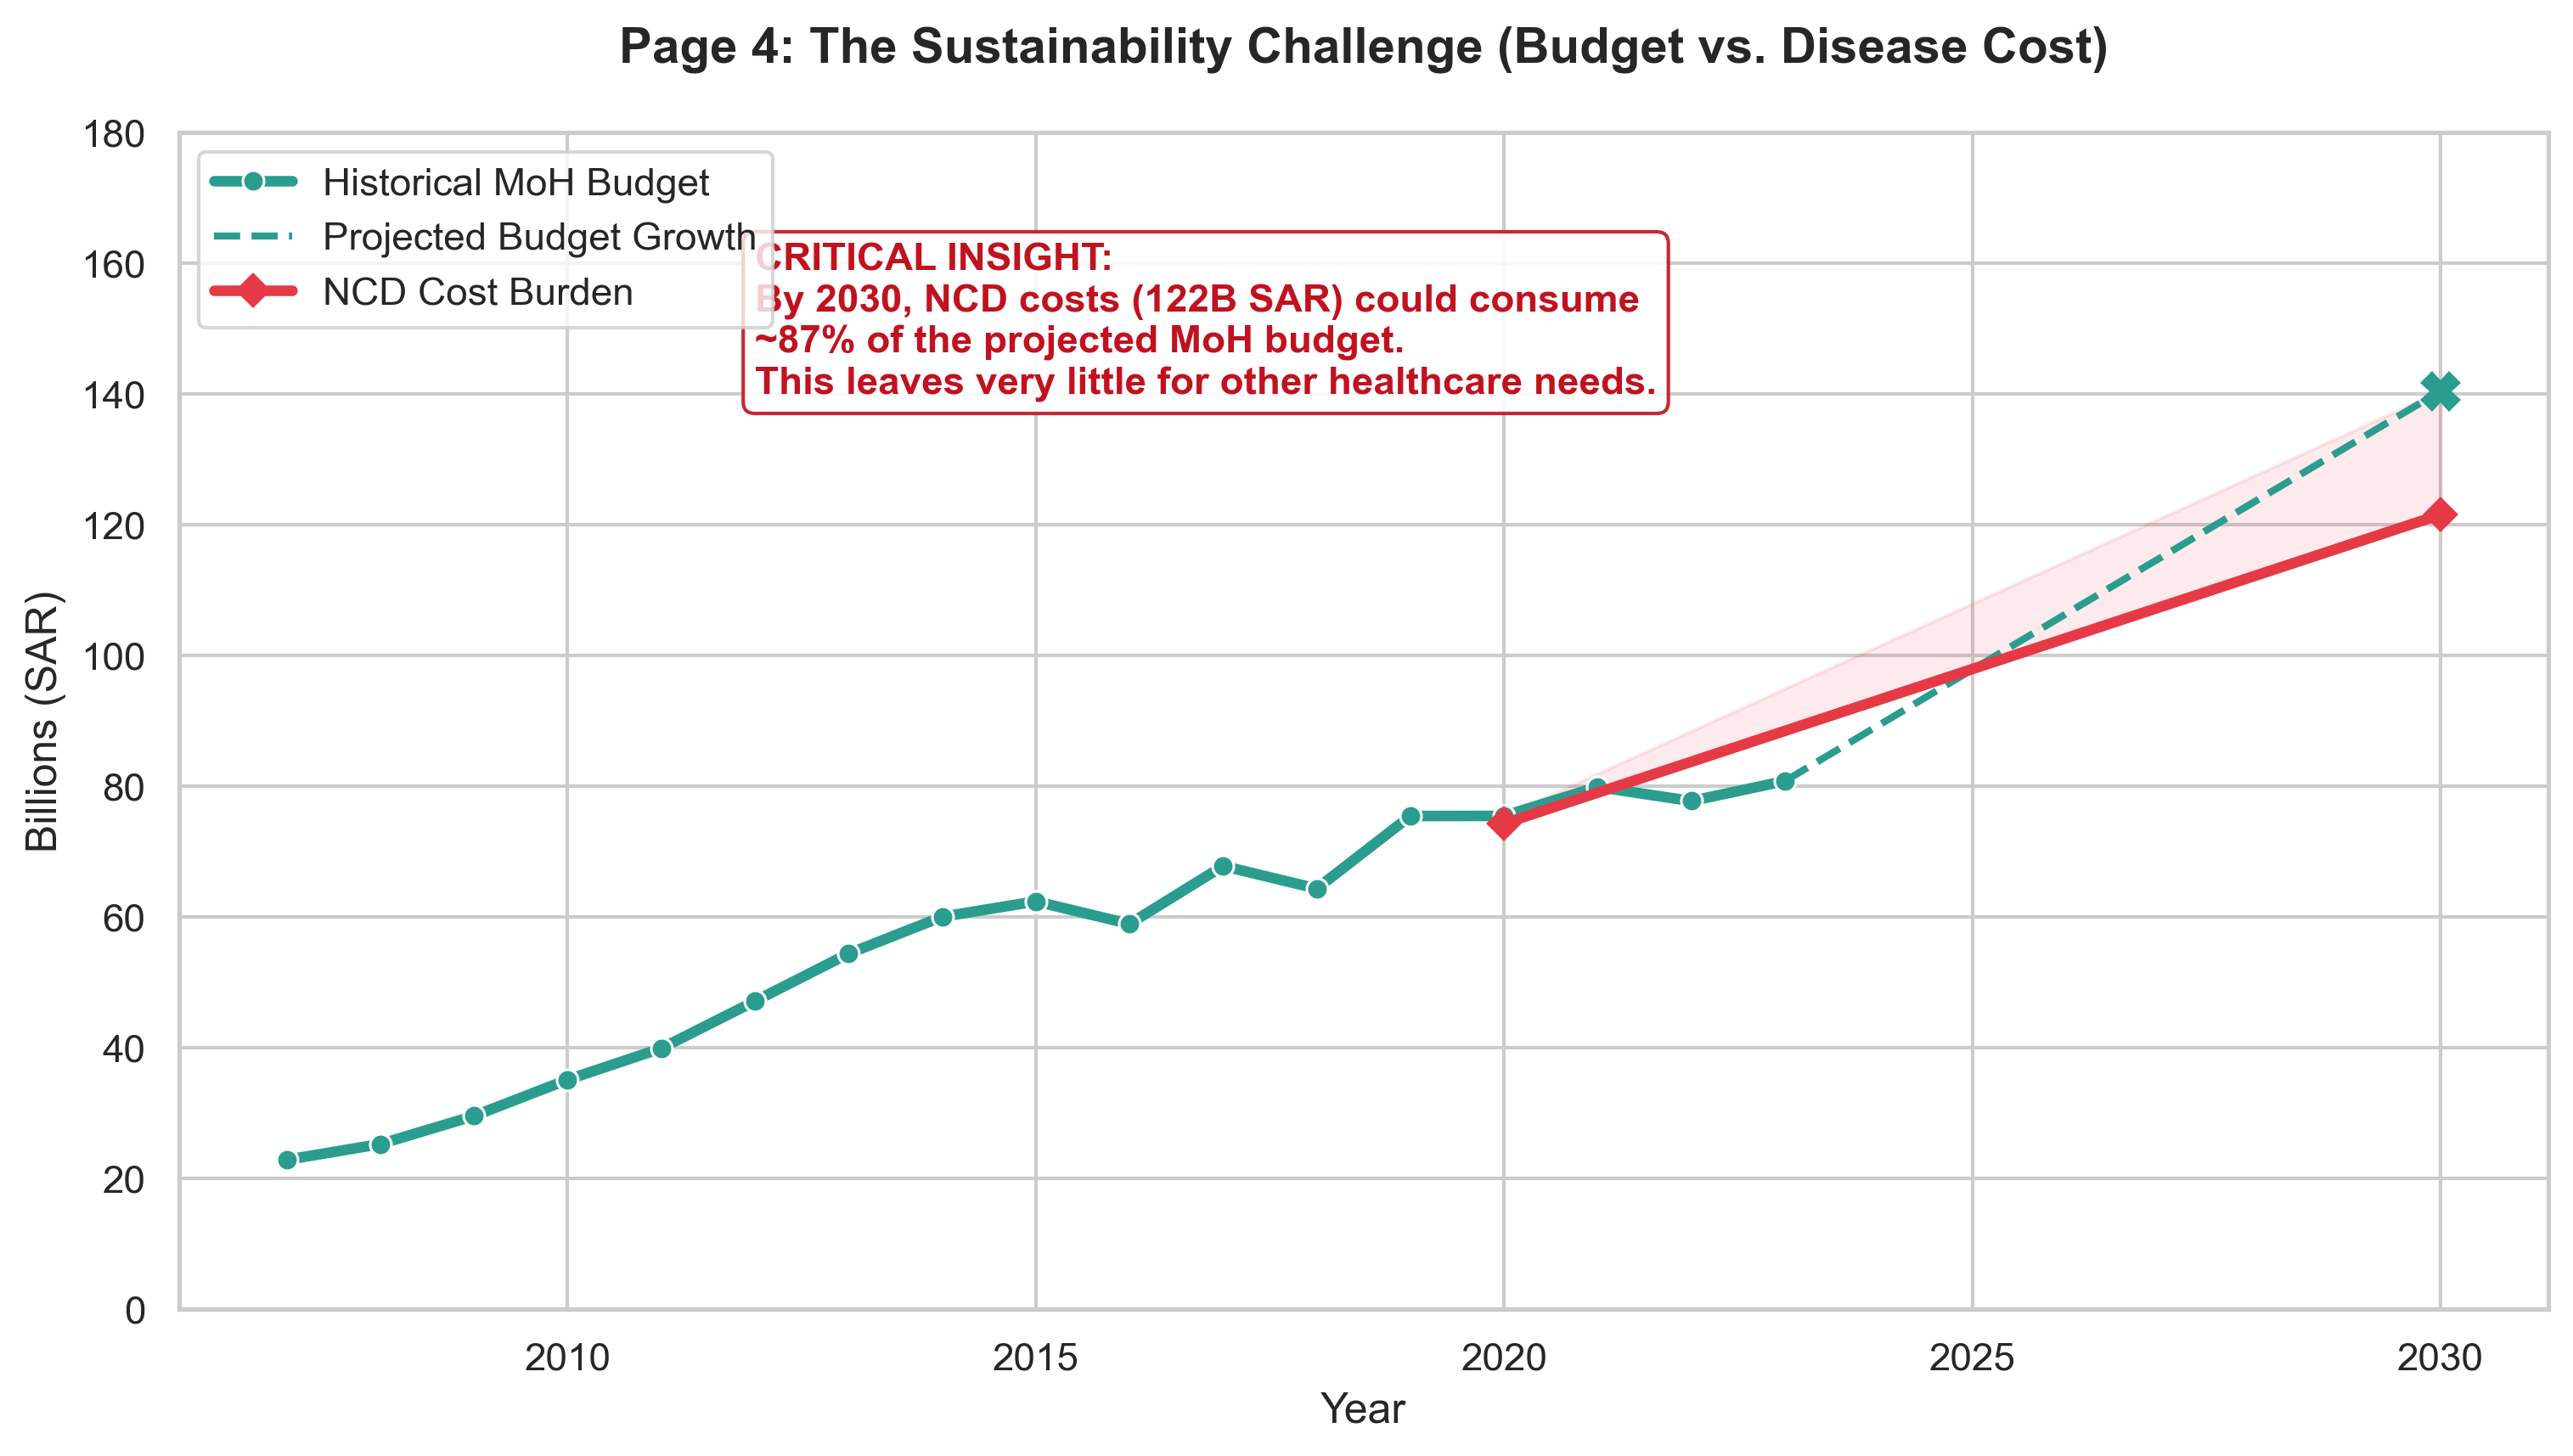

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    plt.close()


print(">>> STEP 4: ANALYZING MOH BUDGET HISTORY...")

df_budget = pd.read_excel('../data/economic_burden/Ministry of Health Budget 2007 To 2023.xlsx')

df_budget = df_budget[['Gregorian_year', 'Total_budget']].copy()

df_budget = df_budget.dropna()

df_budget['Year'] = df_budget['Gregorian_year'].astype(int)
df_budget['Total_budget'] = df_budget['Total_budget'].astype(float)

df_budget['Budget_SAR'] = df_budget['Total_budget'] * 1000

df_budget['Budget_Billion'] = df_budget['Budget_SAR'] / 1_000_000_000

df_budget = df_budget.sort_values('Year')

print(f"   [Success] Loaded {len(df_budget)} years of budget data.")
print(f"   Last recorded budget ({df_budget['Year'].iloc[-1]}): {df_budget['Budget_Billion'].iloc[-1]:.2f} Billion SAR")



start_val = df_budget['Budget_Billion'].iloc[0]
end_val = df_budget['Budget_Billion'].iloc[-1]
years_count = df_budget['Year'].iloc[-1] - df_budget['Year'].iloc[0]

budget_cagr = (end_val / start_val)**(1/years_count) - 1


years_to_2030 = 2030 - df_budget['Year'].iloc[-1]
projected_budget_2030 = end_val * ((1 + budget_cagr) ** years_to_2030)


ncd_cost_2030 = 32.4 * 3.75

share_percentage = (ncd_cost_2030 / projected_budget_2030) * 100

print(f"   -> Historical Budget Growth (CAGR): {budget_cagr:.2%}")
print(f"   -> Projected 2030 Budget: {projected_budget_2030:.2f} Billion SAR")
print(f"   -> NCD Burden 2030: {ncd_cost_2030:.2f} Billion SAR")
print(f"   -> Warning: NCDs could consume {share_percentage:.1f}% of the Ministry's budget.")




fig4, ax4 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_budget, x='Year', y='Budget_Billion', 
             marker='o', linewidth=3, color='#2a9d8f', label='Historical MoH Budget', ax=ax4)

x_proj = [df_budget['Year'].iloc[-1], 2030]
y_proj = [end_val, projected_budget_2030]
ax4.plot(x_proj, y_proj, linestyle='--', color='#2a9d8f', linewidth=2, label='Projected Budget Growth')
ax4.plot(2030, projected_budget_2030, marker='X', markersize=10, color='#2a9d8f')

ncd_x = [2020, 2030]
ncd_y = [19.8 * 3.75, 32.4 * 3.75]
ax4.plot(ncd_x, ncd_y, color='#e63946', linewidth=3, marker='D', label='NCD Cost Burden')

budget_2020_est = np.interp(2020, df_budget['Year'], df_budget['Budget_Billion'])

ax4.fill_between([2020, 2030], ncd_y, [budget_2020_est, projected_budget_2030], 
                 color='#e63946', alpha=0.1)

ax4.set_title('Page 4: The Sustainability Challenge (Budget vs. Disease Cost)', fontsize=14, fontweight='bold', pad=20)
ax4.set_ylabel('Billions (SAR)')
ax4.set_xlabel('Year')
ax4.legend(loc='upper left')
ax4.set_ylim(0, 180) 

insight_text = (f"CRITICAL INSIGHT:\n"
                f"By 2030, NCD costs ({ncd_cost_2030:.0f}B SAR) could consume\n"
                f"~{share_percentage:.0f}% of the projected MoH budget.\n"
                f"This leaves very little for other healthcare needs.")

ax4.text(2012, 140, insight_text, fontsize=11, color='#c1121f', weight='bold',
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='#c1121f', alpha=0.9))
fig4.show()
#ave_plot('Page4_Budget_Sustainability.png')